QR Code Detector

In [1]:
import cv2 as cv #OpenCV
from matplotlib import pyplot as plt
import qrcode

In [14]:
'''
# this cell is used to create QR Code
#data = '0xE3CC6E0B'
#data = '0xE3CC6E0C'
#data = '0xE3CC6E0D'
#data = '0xE3CC6E0E'
#data = '0xE3CC6E0F'
data = '0xE3CC6E0G'

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(data)
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")
img.save("QR_code.png")
'''

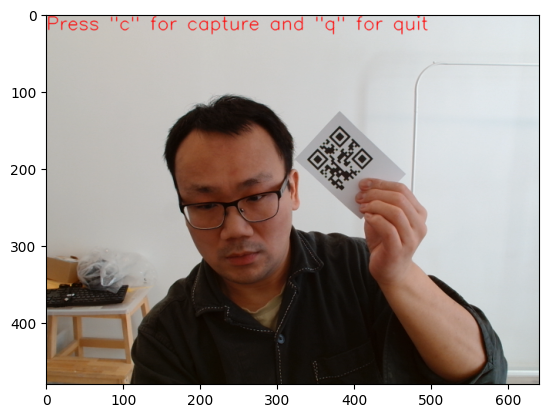

In [25]:
# create camera and detector object
LENGTH_OF_LABEL = 5.5 #cm
cam=cv.VideoCapture(0) #0 is the first connected cam
QRdetector = cv.QRCodeDetector() #create a detector object
'''capture start'''
s = 'Press "c" for capture and "q" for quit'
while (1):

    ret, image_display = cam.read() #an image will be taken
    if ret:
        cv.putText(image_display, text=s, org=[0,20], fontFace=cv.FONT_HERSHEY_SIMPLEX, fontScale=0.8, color=(0, 0, 255), thickness=1, lineType=cv.LINE_AA)
        retval, points, straight_qrcode = QRdetector.detectAndDecode(image_display)
        if retval:
                str_length_QR=str(int(cv.arcLength(points[0], closed=True)/(4*LENGTH_OF_LABEL)))+' px/cm'
                cv.polylines(image_display, points.astype(int),isClosed=True,color=(0,255,0),thickness=3)
                cv.circle(img=image_display, center=points[0][0].astype(int), radius=4, color=(0, 255, 0), thickness=2)
                str_length_QR=str(int(cv.arcLength(points[0], closed=True)/(4*LENGTH_OF_LABEL)))+' px/cm'
                cv.putText(image_display, str_length_QR, points[0][0].astype(int), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1, cv.LINE_AA)
        cv.imshow("LiveVideo", image_display) #show image in a window name "LiveVideo", which refresh every loop
        
    '''this is how to stop the capturing'''
    Keypressed = cv.waitKey(1)
    if Keypressed==ord("q"): # q for quit, ord convert the char into a corresponding int
        cam.release() #drop the connection to cam
        cv.destroyAllWindows() #close all openCV windows
        break
    if Keypressed==ord("c"):
        plt.figure()
        plt.imshow(cv.cvtColor(image_display, cv.COLOR_BGR2RGB))
        plt.show()
        break
cam.release() #drop the connection to cam
cv.destroyAllWindows() #close all openCV windows


0xE3CC6E0F
[[[ 12.994946  89.90932 ]
  [321.25183   75.897644]
  [329.03998  399.66254 ]
  [ 30.02514  395.45105 ]]]


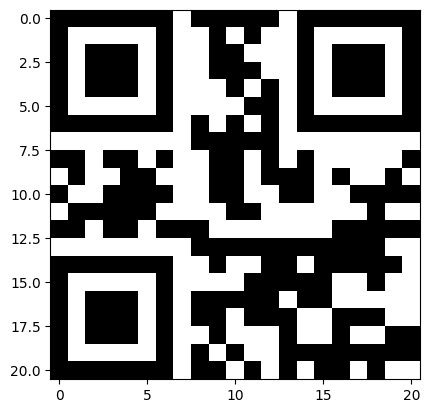

(480, 640, 3)

In [23]:
print(retval)
print(points)
plt.figure()
plt.imshow(cv.cvtColor(straight_qrcode, cv.COLOR_BGR2RGB))
plt.show()
points[0][0].astype(int)
image_display.shape